In [1]:
from pyfiles.nonftsteane import *

In [2]:
n = 15

angle = np.linspace(0,1,n+2)
angle = np.delete(angle, [n+1])
angle = np.delete(angle, [0])

a, b = [], []
with open("text/unitary{}.txt".format(n), "r") as file:
    for line in file:
        a.append(list(map(str, line.strip().split(","))))
with open("text/adjunitary{}.txt".format(n), "r") as file:
    for line in file:
        b.append(list(map(str, line.strip().split(","))))

In [52]:
qc = code_goto()
X_L(qc, 1)
H_L(qc, 0)
###############
#root_T_L(qc, 0, err=True)
# #qec(qc, 0)

# root_T_L(qc, 1, err=True)
# #qec(qc, 1)

# CNOT_L(qc, 0)

# adj_root_T_L(qc, 1, err=True)
# #qec(qc, 1)

# CNOT_L(qc, 0)
# ################
# adj_T_L(qc, 0)
H_L(qc, 0)

#qec(qc, 0)

zeros, ones, pre , post = readout(qc, 0, 100, 0.00)

print("Preselection discarded: ", pre*100, "%")
print("Postselection discarded: ", post*100, "%")
print("Accepted 0: ", zeros*100, "%")
print("Accepted 1: ", ones*100, "%")
print("Total discarded: ", (pre+post)*100, "%")
print("Succesrate: ", zeros/(ones+zeros))

{'1010101 00000000': 11, '0000000 00000000': 9, '1011010 00000000': 16, '0111100 00000000': 16, '1100110 00000000': 11, '0001111 00000000': 16, '0110011 00000000': 9, '1101001 00000000': 12}
['00', '00', '00', '00', '00', '00', '00', '00']
Preselection discarded:  0.0 %
Postselection discarded:  0.0 %
Accepted 0:  100.0 %
Accepted 1:  0.0 %
Total discarded:  0.0 %
Succesrate:  1.0


In [ ]:
def gen_data(name):
    p = [0.00, 0.001, 0.002, 0.003]
    y_all, y_all1 = [],[]
    err, err1 = [], []

    for r in p:
        ok, errr = avg15(3, 15, argh=r, err=False, k=1)
        y_all.append(ok), err.append(errr)
        ok1, errr1 = avg15(3, 15, argh=r, err=True, k=1)
        y_all1.append(ok1), err1.append(errr1)

    data = np.array((p, y_all, y_all1, err, err1))
    np.savetxt("TEST{}.txt".format(name), data, delimiter=",")

gen_data(000)

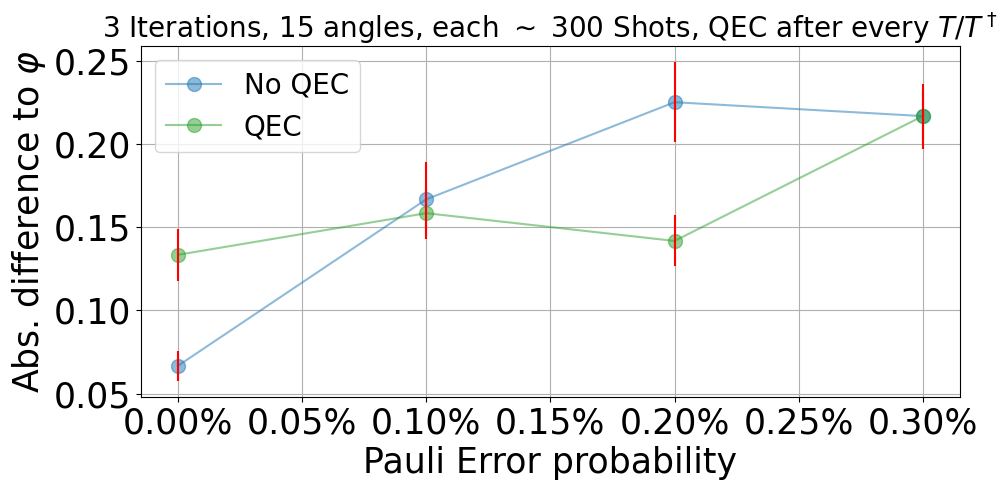

In [ ]:
x, y, y_qec, err, err_qec = np.loadtxt("TEST0.txt", delimiter = ",")          #QEC after every third T/Tdg

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

err = [i/((100)**0.5) for i in err]
err_qec = [i/((100)**0.5)for i in err_qec]


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title(r"3 Iterations, 15 angles, each $\sim$ 300 Shots, QEC after every $T/T^\dagger$", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=25)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax1.legend(fontsize=20)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
#plt.savefig("Figures/SteaneFinal3.png", dpi = 200)
plt.show()